In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("cubehelix")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet("train.parquet")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
index,,,,,,,,,,,,,,,,,,,
26817,INN26818,2,0,2,3,Meal Plan 1,0,Room_Type 1,244,2018,10,30,Online,0,0,0,85.85,0,Canceled
7537,INN07538,2,0,0,3,Meal Plan 1,0,Room_Type 1,276,2018,9,22,Online,0,0,0,95.00,0,Canceled
6217,INN06218,2,0,1,2,Meal Plan 1,0,Room_Type 1,233,2018,10,14,Online,0,0,0,90.00,0,Canceled
22883,INN22884,2,0,2,2,Meal Plan 1,0,Room_Type 1,156,2018,7,2,Online,0,0,0,93.08,1,Canceled
28669,INN28670,2,0,0,3,Meal Plan 1,0,Room_Type 1,76,2018,4,12,Online,0,0,0,69.33,0,Not_Canceled


In [3]:
df.drop(["Booking_ID", "arrival_year"], axis=1, inplace=True)

In [4]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df["no_of_adults"].value_counts()

no_of_adults
2    20953
1     6117
3     1817
0      122
4       11
Name: count, dtype: int64

In [7]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [8]:
cat_features = ["type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "market_segment_type", "repeated_guest", "booking_status"]
num_features = [feat for feat in df.columns if feat not in cat_features]
for feat in cat_features:
    df[feat] = df[feat].astype("category")

df.dtypes

no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                       category
required_car_parking_space              category
room_type_reserved                      category
lead_time                                  int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                     category
repeated_guest                          category
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                          category
dtype: object

In [9]:
num_features

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

## Univariate analysis

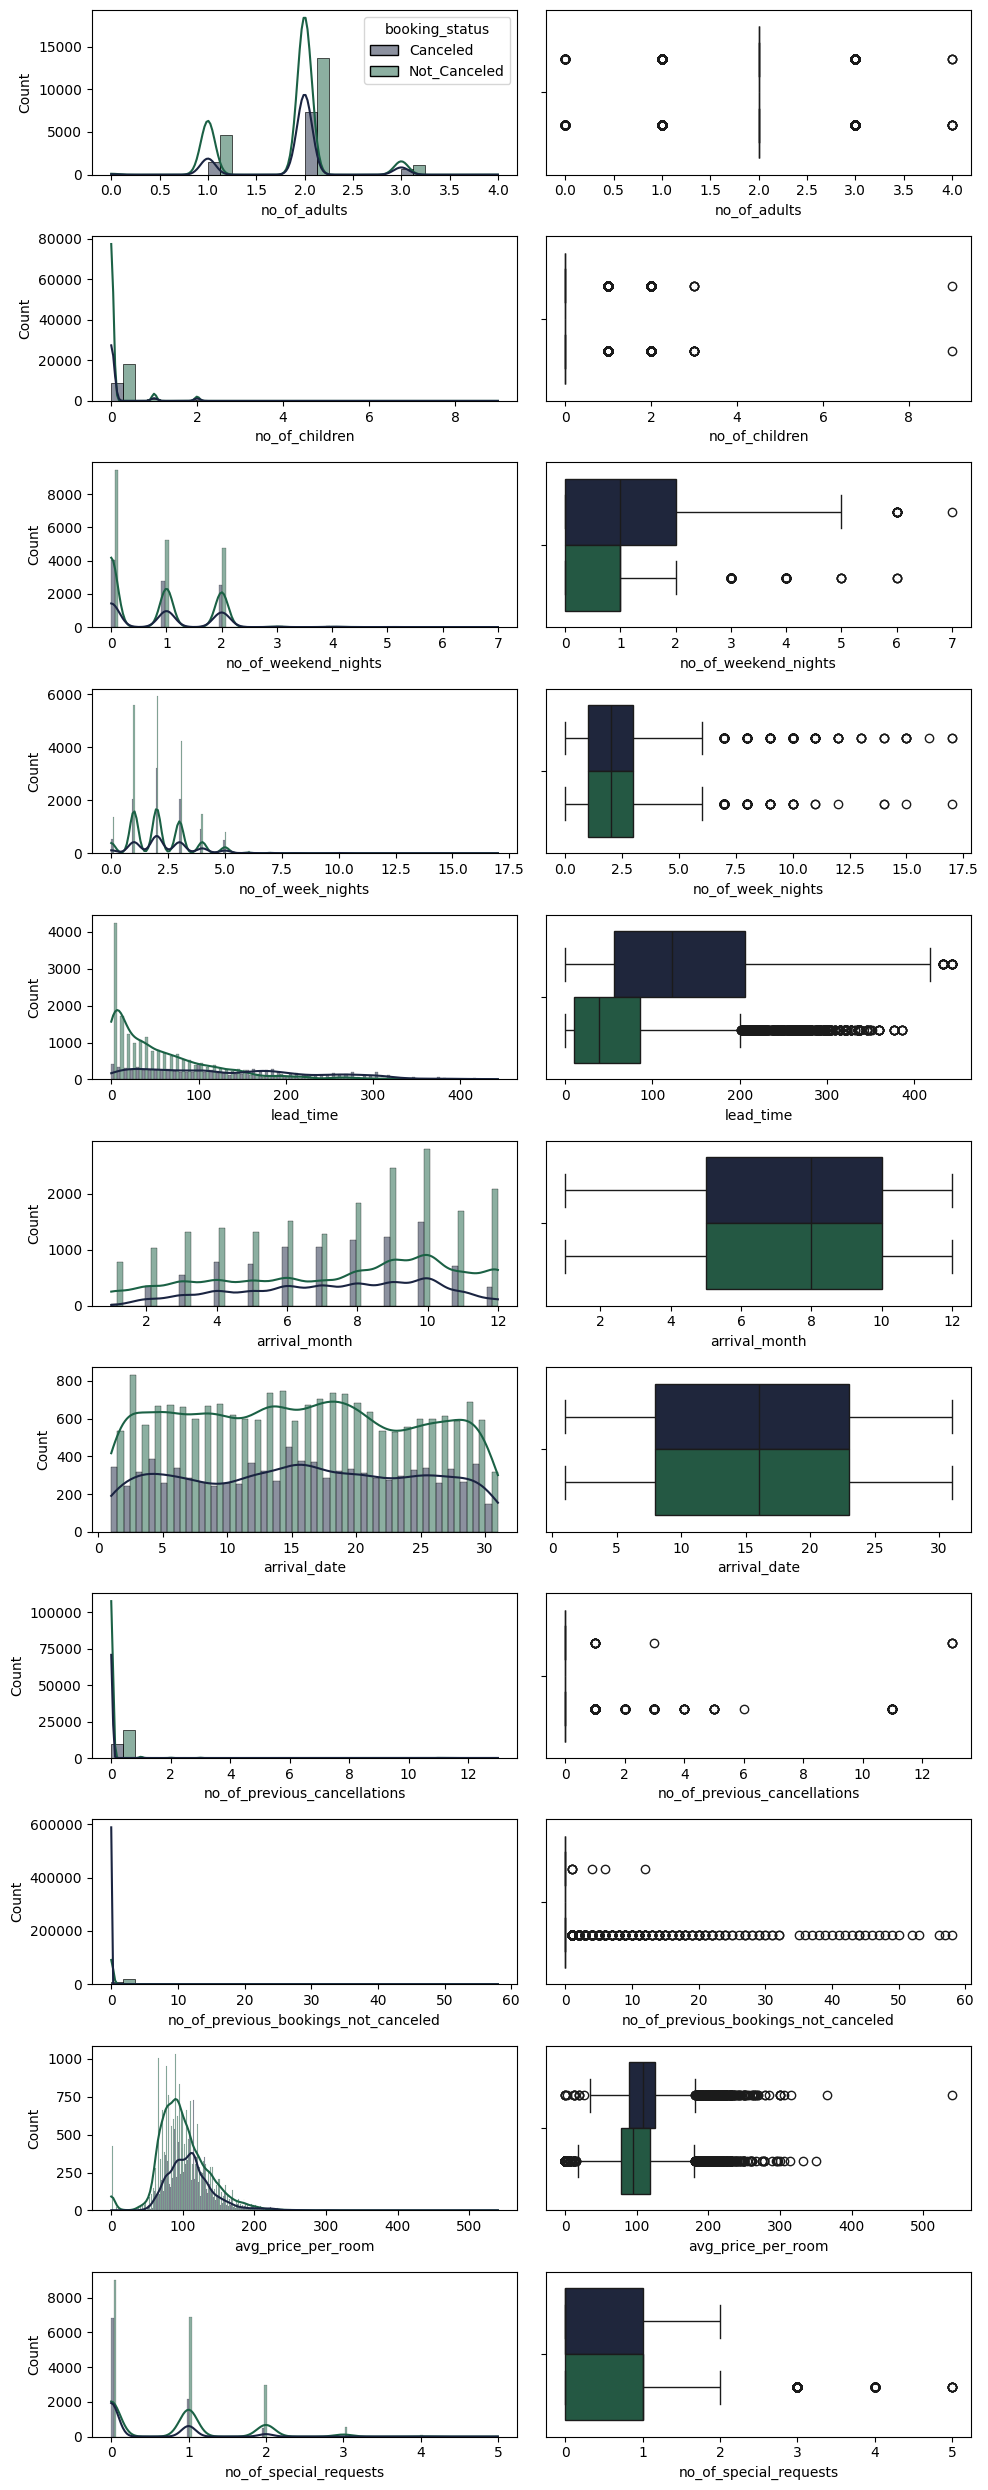

In [10]:
fig, axes = plt.subplots(nrows=len(num_features), ncols=2)

for i, feat in enumerate(num_features):
    sns.histplot(data=df, x=feat, hue="booking_status", multiple="dodge", ax=axes[i, 0], kde=True, legend=i == 0)
    sns.boxplot(data=df, x=feat, hue="booking_status", ax=axes[i, 1], legend=False)

plt.gcf().set_size_inches((10, 25))
plt.tight_layout()
plt.show()

<Axes: >

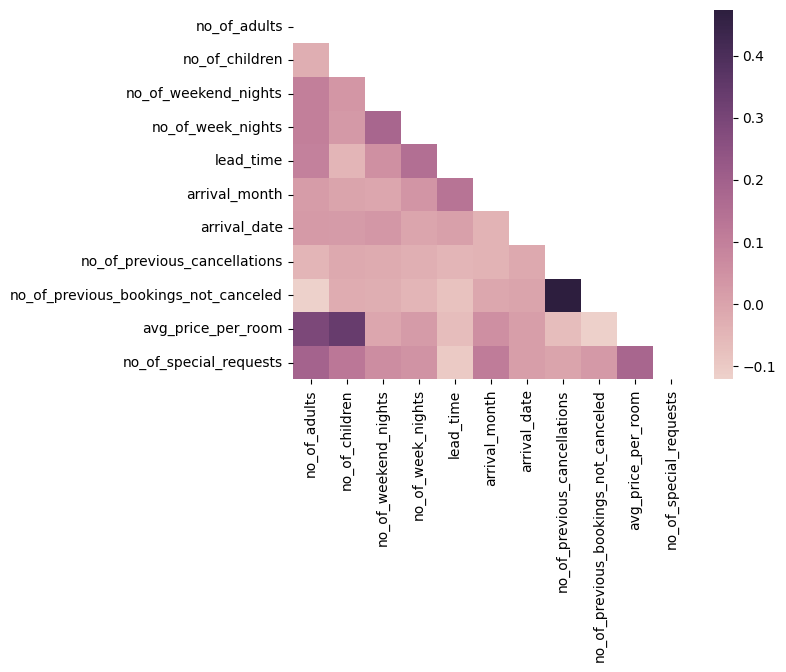

In [11]:
corr = df[num_features].corr()
sns.heatmap(corr, mask=np.triu(corr), cmap=sns.cubehelix_palette(as_cmap=True))

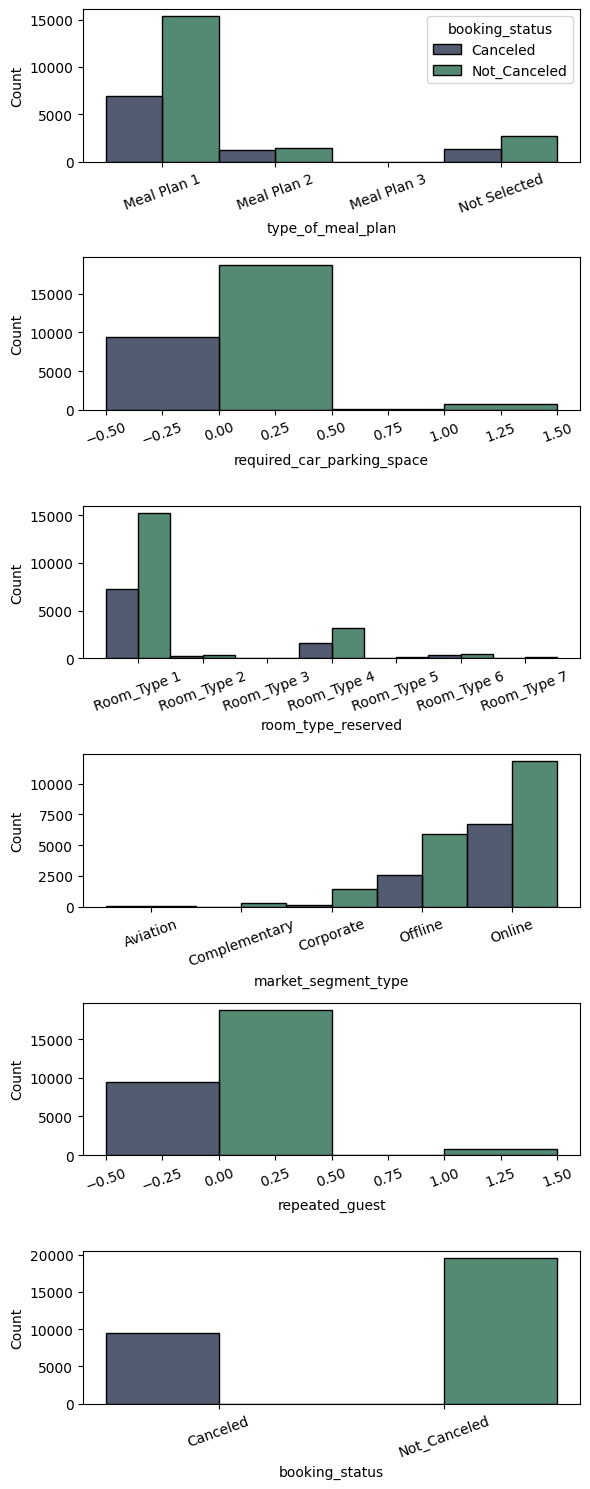

In [12]:
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1)

for i, feat in enumerate(cat_features):
    ax = axes[i]
    sns.histplot(data=df, x=feat, ax=ax, hue="booking_status", multiple="dodge", legend=i == 0)
    ax.tick_params(axis='x', labelrotation=20)
    # sns.boxplot(data=df, x=feat, ax=axes[i, 1])

plt.gcf().set_size_inches((6, 15))
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

mappings = {}

for col in cat_features:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    mappings[col] = {label: code for label, code in zip(enc.classes_, enc.transform(enc.classes_))}

mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [14]:
skew = df[num_features].skew()
skew

no_of_adults                            -0.361268
no_of_children                           4.515555
no_of_weekend_nights                     0.741558
no_of_week_nights                        1.569513
lead_time                                1.290614
arrival_month                           -0.354123
arrival_date                             0.023305
no_of_previous_cancellations            24.717986
no_of_previous_bookings_not_canceled    18.477412
avg_price_per_room                       0.696855
no_of_special_requests                   1.149941
dtype: float64

In [15]:
skew_thresh = 5
for col in skew.index[skew > skew_thresh]:
    df[col] = np.log1p(df[col])

In [16]:
df[num_features].skew()

no_of_adults                            -0.361268
no_of_children                           4.515555
no_of_weekend_nights                     0.741558
no_of_week_nights                        1.569513
lead_time                                1.290614
arrival_month                           -0.354123
arrival_date                             0.023305
no_of_previous_cancellations            14.167502
no_of_previous_bookings_not_canceled     8.715065
avg_price_per_room                       0.696855
no_of_special_requests                   1.149941
dtype: float64

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

def evaluate_model_in_searchspace(model, search_space, X_train, y_train, X_test, y_test):
    rs = RandomizedSearchCV(estimator=model, param_distributions=search_space, cv=5, random_state=42, scoring="f1")
    rs.fit(X_train, y_train)
    pred = rs.predict(X_test)
    acc = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = 2 * recall * precision / (recall + precision)
    return rs.best_estimator_, {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1-score": f1}

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

TARGET_COL = "booking_status"

X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# balancing data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
gb_search_space = {
    "learning_rate": [0.0001, 0.001, 0.01],
    "n_estimators": [20, 50],
    "subsample": [1.0, 0.75, 0.5]
}

dt_search_space = {
    "criterion": ["gini", "entropy", "log_loss"], 
    "splitter": ["best", "random"],
    "max_depth": [None, 2, 5, 10]
}

rf_search_space = {
    "max_depth": [None, 2, 5, 10],
    "n_estimators": [20, 50],
    "bootstrap": [True, False]
}

adaboost_search_space = {
    "learning_rate": [0.0001, 0.001, 0.01],
    "n_estimators": [20, 50],
}

In [22]:
seed = 42

models_search_space = [
    ("GB", GradientBoostingClassifier(random_state=seed), gb_search_space),
    ("RF", RandomForestClassifier(random_state=seed), rf_search_space),
    ("AB", AdaBoostClassifier(random_state=seed), adaboost_search_space),
    ("DT", DecisionTreeClassifier(random_state=seed), dt_search_space)
]

In [33]:
trained_models_original = {}
collected_metrics = []

data = {
    "No resampling": (X_train, y_train, X_test, y_test),
    "Resampling": (X_resampled, y_resampled, X_test, y_test)
}

for data_name, data_splits in data.items():
    trained_models[data_name] = {}
    for name, model, search_space in models_search_space:
        trained_model, metrics = evaluate_model_in_searchspace(model, search_space, *data_splits)
        trained_models[data_name][name] = trained_model
        metrics["Name"] = name
        metrics["Resampling"] = data_name
        collected_metrics.append(metrics)

metric_df = pd.DataFrame(collected_metrics)
metric_df

,Accuracy,Recall,Precision,F1-score,Name,Resampling
0,0.755384,1.000000,0.733393,0.846193,GB,No resampling
1,0.873277,0.925874,0.890202,0.907687,RF,No resampling
2,0.759864,0.916592,0.770211,0.837050,AB,No resampling
3,0.830031,0.864422,0.880772,0.872521,DT,No resampling
4,0.785148,0.810844,0.861701,0.835499,GB,Resampling
5,0.867591,0.904302,0.899465,0.901877,RF,Resampling
6,0.759864,0.916592,0.770211,0.837050,AB,Resampling
7,0.826111,0.846435,0.889779,0.867566,DT,Resampling


In [34]:
import joblib
joblib.dump(trained_models["No resampling"]["RF"], "random_forest.pkl")

['random_forest.pkl']

In [35]:
loaded_model = joblib.load("random_forest.pkl")

In [36]:
predictions = loaded_model.predict(X_train[:5])
predictions

array([0, 0, 0, 1, 0])